In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Import different modules for using with the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.linear_model import LogisticRegression as logis
from sklearn.metrics import confusion_matrix

from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model, datasets

import itertools
import math

# Generate training data

[[-1  1 -1]
 [-1  1  1]]
(2, 1000)
(337, 1000)


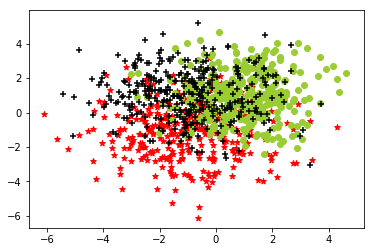

In [3]:
# Training data - three randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2+1, size = N)
# Mean of each cluster
means = np.array([[-1, 1, -1], [-1, 1, 1],])
print(means)
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 3)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])
print(X.shape)
y1 = y[y==1].reshape(335,1)
y0 = y[y==0].reshape(337,1)
y2 = y[y==0]
#print(y2)

X0 = X[0]
X1 = X[1]

X00 = X0[y==0]
X10 = X1[y==0]

X01 = X0[y==1]
X11 = X1[y==1]

X02 = X0[y==2]
X12 = X1[y==2]


c = ['r','yellowgreen','black']
m = ['*', 'o', '+','+']

print(X[y[y==0]].shape)
for i in range (0,3):
    plt.figure
    plt.scatter(X0[y==i], X1[y==i], color = c[i], marker = m[i])
#print(X00)
#print(X11)  
#print(X)
# Plot the data

#plt.scatter(X00, X10, color = 'b')
#plt.show()

#### Display the data that you generated to find something like the following:

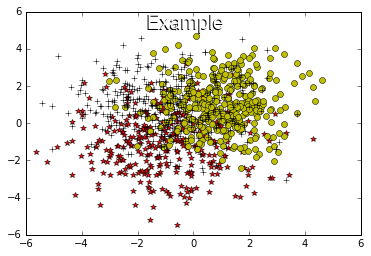

In [4]:
display(Image(filename='./images/wm_dat1.png'))

# Fit the training data to the scikit-learn softmax classifier

The image above shows that there is considerable overlap between the classes. Use your trained classifier to assign all the training data to different classes.

**Print the confusion matrix and also plot it, to get something like the image below:**

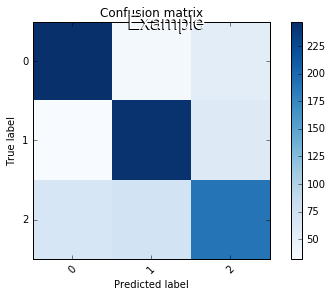

[[247  36  54]
 [ 32 244  59]
 [ 66  72 190]]


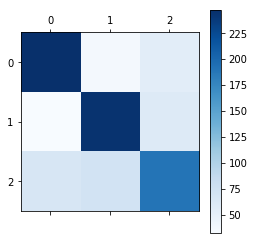

In [5]:
#https://chrisalbon.com/machine_learning/naive_bayes/multinomial_logistic_regression/

display(Image(filename='./images/wm_confusion.png'))

clf = logis(random_state=0, solver='lbfgs', multi_class = 'multinomial').fit(X.T, y) #create multinomial regression and train
y_pred = clf.predict(X.T)
c_m = confusion_matrix(y, y_pred)

print(c_m)
plt.figure
plt.matshow(c_m, cmap = 'Blues')
plt.colorbar()



**Now plot the different classes as predicted by your system. You should get something like:** 

**Can you tell from the graph that this is a *linear* classifier?**

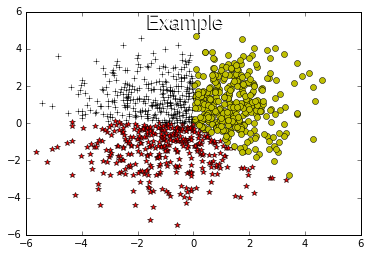

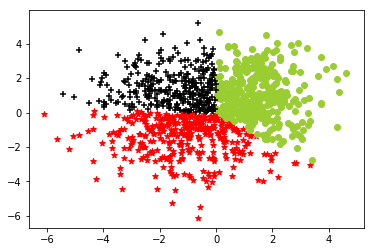

In [6]:
display(Image(filename='./images/wm_dat2.png'))
for i in range (0,3):
    plt.figure
    plt.scatter(X0[y_pred==i], X1[y_pred==i], color = c[i], marker = m[i])


# Implement a Naive Bayes Classifier

Implement your own Naive Bayes Classifier (from first principles). Train it using the exact same data you used for the previous question (write it in a seperate python file which you can import into the notebook). Implement it in a generic way, i.e. it should be able to work on $d$ dimensional data and it should not be limited to a certain amount of classes.

Use your trained classifier to assign all the training data to different classes.

**Print the confusion matrix and also plot it, to get something like the image below:**

(1000,)
float64
float64


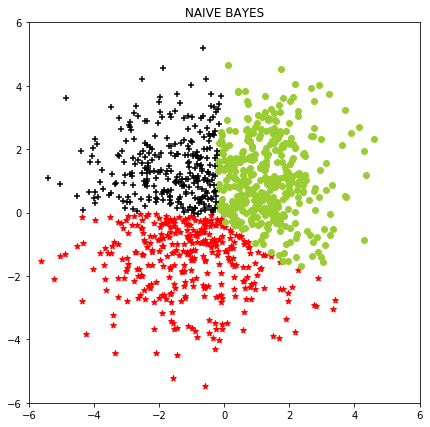

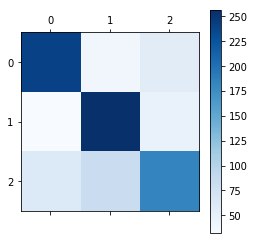

In [10]:
#display(Image(filename='./images/conf_mat_bayes.jpg'))

#Class probability
d = X.shape[0]
N = y.size
k = np.unique(y).size
C_prob = np.zeros([k])

for i in range(N):
    for j in range(k):
        if y[i] ==j:
            C_prob[j] += 1
#class_samples = C_prob
#print(class_samples)
C_prob = C_prob/N


#my_means & var
my_means =np.zeros([k, d])
var = np.zeros([k, d])

for i in range(N):
    for j in range(k):
        if y[i] == j:
            for index in range(d):
                my_means[j][index] = np.mean(X.T[y==j, index])
                var[j][index] = np.var(X.T[y==j, index])

                        
#class conditionals
def my_prob(x, mean, var1):
    e = math.exp(-((x-mean)**2)/(var1*2))
    return (1/(math.sqrt(2*math.pi*var1))*e)

P_conditional = np.ones([N,k])

for i in range(N):
    for j in range(k):
        for index in range(d):
            P_conditional[i][j] *= my_prob(X.T[i][index], my_means[j][index], var[j][index])
        P_conditional[i][j] *= C_prob[j]   
            


y_pred2 = np.zeros(N)
for i in range(N):                                     
    y_pred2[i] = np.argmax(P_conditional[i])  
print(y_pred2.shape)    
plt.figure(figsize=(7,7))
for i in range (0,3):
    plt.figure
    plt.scatter(X.T[y_pred2==i, 0], X.T[y_pred2==i, 1], color = c[i], marker = m[i])
    plt.ylim(-6,6)
    plt.xlim(-6,6)
    plt.title("NAIVE BAYES")
print(C_prob.dtype)
print(P_conditional.dtype)


c_m = confusion_matrix(y, y_pred2)
plt.figure
plt.matshow(c_m, cmap = 'Blues')
plt.colorbar()
   


**Now plot the different classes as predicted by your system. You should get something like:**

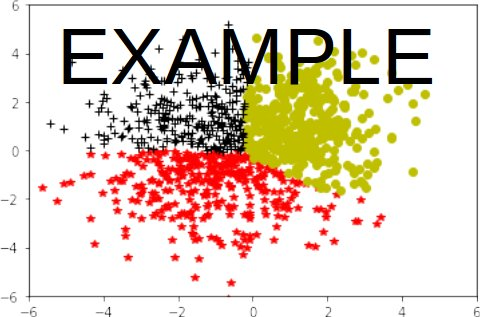

In [8]:
display(Image(filename='./images/predict_bayes.jpg'))


# Implement a Logistic Regression Classifier

Implement your own Logistic Regression classifier (from first principles). It should be generic and be able to work on $d$ dimensional data (and two classes). Please make your implementation as modular as possible, having a seperate function for the Hessian and the gradient vector (write it in a seperate python file which you can import into the notebook). A regularization term based on a Gaussian prior (with zero mean and covariance matrix $\lambda\mathbf{I}$) must be included.  Optionally, a bias term also needs to be incorporated into your classifier - this can be implemented by augmenting the training dataset with an additional all-one feature.

**Now train your classifier using the following data.**

In [9]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2, size = N)
# Mean of each cluster
means = np.array([[-1, 1], [-1, 1],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 2)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

for i in range(0,2):
    plt.figure
    plt.scatter(X.T[y==i, 0], X.T[y==i, 1], color = c[i], marker = m[i])
    

d = X.shape[0]
N = y.size
k = np.unique(y).size
C_prob = np.zeros([k])
W = np.zeros(k+1)

def Prob_C(ax):
    exponent = 1/(1+math.exp(-ax))
    return exponent

def predict(x1, x2, W)
    y = W[0] + W[1]*x1 + W[2]*x2
    

SyntaxError: invalid syntax (<ipython-input-9-2a2cb23b9e6b>, line 30)

Use your trained classifier to assign all the training data to different classes.

**Print the confusion matrix and also plot it, to get something like the image below:** 

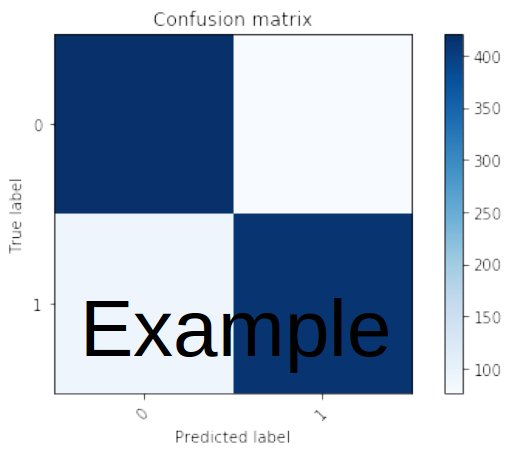

In [10]:
display(Image(filename='./images/conf_mat_logreg.jpg'))

**Now plot the different classes as predicted by your system. Add your decision boundary to the same plot. You should get something like:**

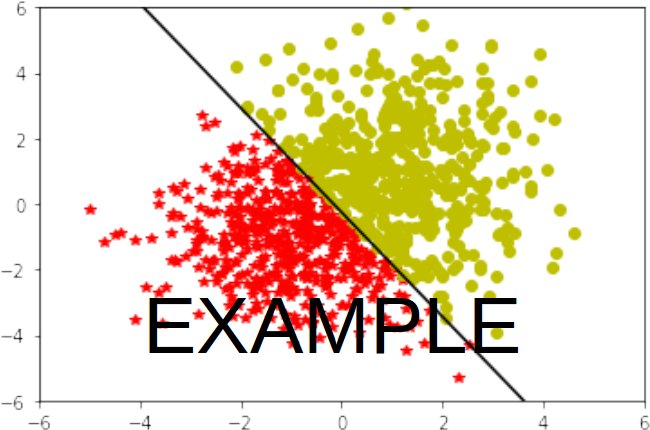

In [11]:
display(Image(filename='./images/predict_logreg.jpg'))

** Before continuing in the notebook, you will need to install the `lasagne` Python module with "pip3 install --user lasagne" **

# Now classify the MNIST digits 

The MNIST database provided in the assignment resources consists of low-resolution (28x28) grayscale images of handwritten digits ($0,1,2,3,4,5,6,7,8,9$). First, you read in a set of training digits and display them interactively to get an idea what they look like. Afterwards, you build and train a softmax classifier using scitkit-image and scikit-learn. You will then classify the digits in the test set and display the results. Finally, you will display the weights as images.

First load the dataset - for more information about the dataset, see http://yann.lecun.com/exdb/mnist/.

In [12]:
from mnist import load_dataset
X_train, y_train, X_valid, y_valid, X_test, y_test = load_dataset()

## Display the test digits interactively.

In [13]:
from ipywidgets import interact
def show_digits(k=0):
    """
    Show the first 1000 digits in the training set
    """
    
    plt.imshow(X_train[k][0], cmap=cm.binary)   
    
    plt.show()
    
w = interact(show_digits, k =(0, 1000)) 


interactive(children=(IntSlider(value=0, description='k', max=1000), Output()), _dom_classes=('widget-interact…

## Train the softmax classifier

**Using the training set, build a softmax classifier. Use this classifier to classify the digits in the training set and the test set separately. Print the confusion matrix and also display it as an image for each case to get something like:**

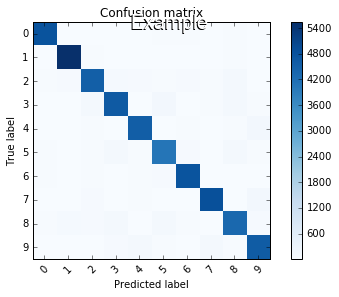

In [14]:
display(Image(filename='./images/wm_confusion2.png'))

### Accuracy

**Calculate the accuracy of your system as a fraction of the correctly classified digits. You should get something like 0.9254. use - `logis(C=1e5, solver='lbfgs', multi_class='multinomial')`**

## Extracting the weights and display as images.

**Extract the weights of the softmax classifier and display them as images. Each set of weights should correspond to a specific digit**. 

**As an example the weight image associated with the 0 digit should look similar to this:**

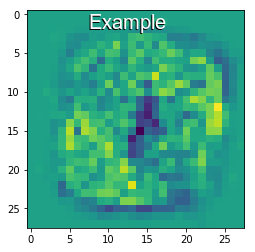

In [15]:
display(Image(filename='./wm_softmax_mnist_weights/wm_0.png'))

## Further investigation

Fit the softmax classifier for different values of the regularization parameter - we recommend values evenly spaced on the log scale - and show the corresponding weight images for some digit as the parameter changes.  Explain the changes in the weight images observed. Moreover, plot the accuracy of your classifier as a function of the regularization parameter. Use this plot to expand on your answer.

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

SyntaxError: invalid syntax (<ipython-input-1-6001ee366e0e>, line 1)

In [46]:
def estimate_u(x,c):
    u0 = 0.0 #mean var associated with class 0 (having class label 0)
    u1 = 0.0 #mean var associated with class 1 (having class label 1)
    #NB: Return 0.0 for a specific class mean if you find no features belonging to that class.
    
    #MISSING CODE GOES HERE
    l_X = len(x)
    a = 0.0
    b = 0.0
    
    for k in range(l_X):
        if c[k] == 0:
            u0 = u0 + x[k]
            a = a +1
        else:
            u1 = u1 + x[k]
            b = b + 1
    if a != 0:
        u0 = u0/(a)
    if b != 0:
        u1 = u1/(b) 
    return u0, u1
print(estimate_u([1,3,2,5],[0,1,0,1]))



(1.5, 4.0)
